In [1]:
#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('winequality-white.csv', sep=';')#data is separated by

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
df.shape

(4898, 12)

#feature identication says quality is our target variable and rest is our predictors

data doesnot have any categorical values only continous variable with numeric datatypes of float and int

non null say there is no null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


So there is no negative values and there is 0 for citric acid which is acceptable

The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers.

The "median" is the "middle" value in the list of numbers. To find the median, your numbers have to be listed in numerical order from smallest to largest, so you may have to rewrite your list before you can find the median.

The "mode" is the value that occurs most often. If no number in the list is repeated, then there is no mode for the list.

Here you will notice , mean values is more than median which is 50Th percentile.

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”,”free sulfur dioxide”,”total sulfur dioxide”.

Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.

In [9]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

So out of rating 1 to 10 , we have no values with 1,2,10

In [10]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

By this we can judge mot of the values are under 6,5,7 quality

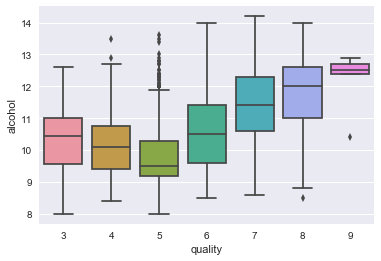

In [11]:
sns.boxplot(x= 'quality' , y='alcohol', data=df)

    

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

median (Q2/50th Percentile): the middle value of the dataset.

first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

interquartile range (IQR): 25th to the 75th percentile.

whiskers (shown in blue)

outliers (shown as green circles)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

'outliers= 3* IQR or more than that

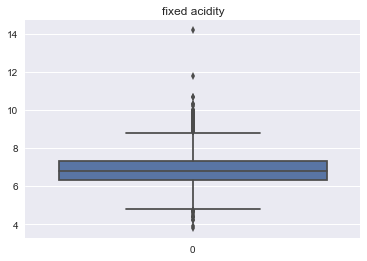

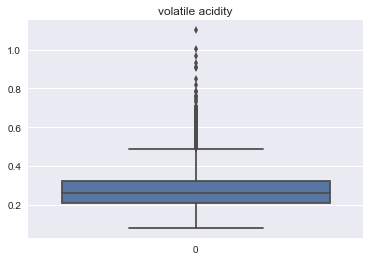

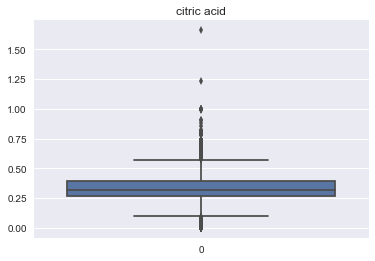

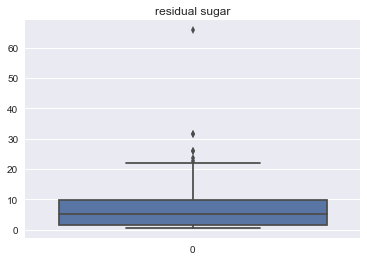

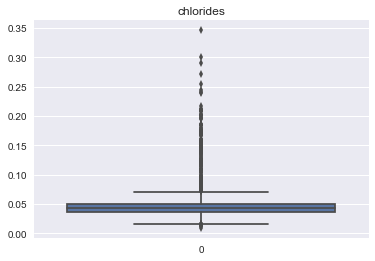

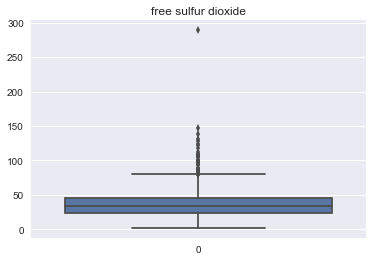

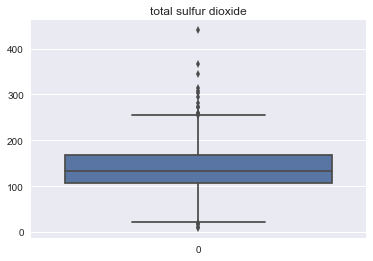

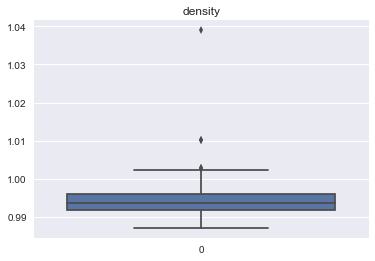

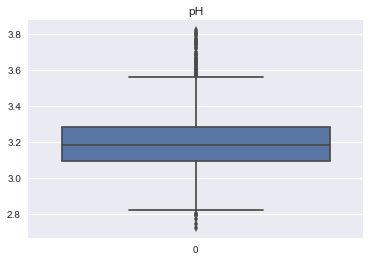

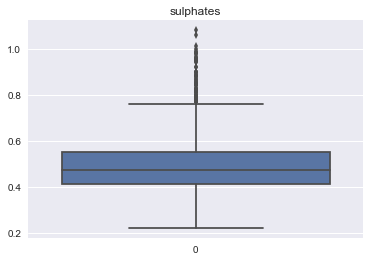

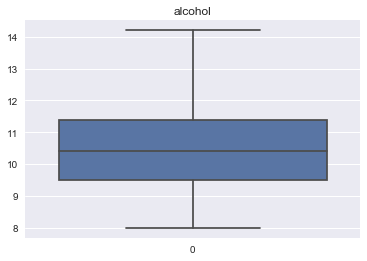

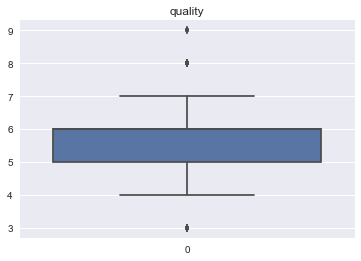

In [12]:
for i in df.columns:
    sns.boxplot(data= df[i])
    plt.title(i)
    plt.show()

In this we can see Except alcohol, every column has their outliers mainly in maximum

# Density plot to check linearity


To check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features.

Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution


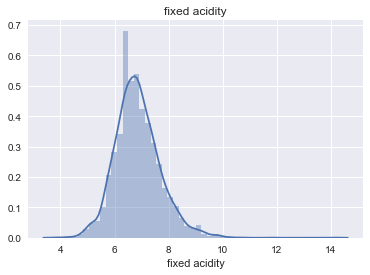

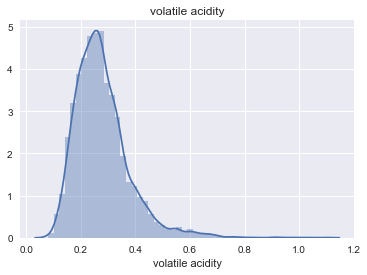

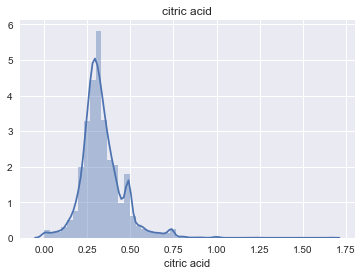

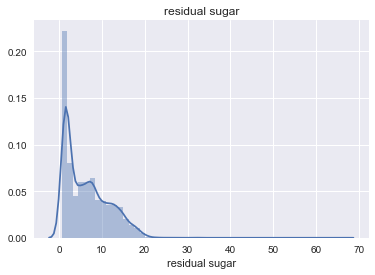

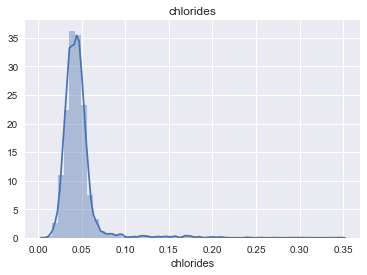

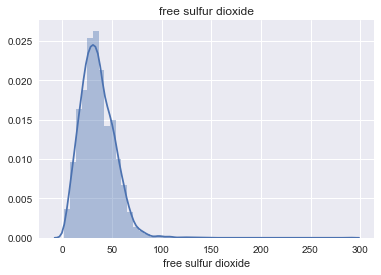

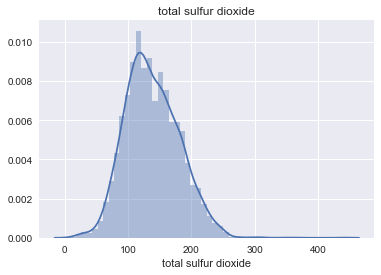

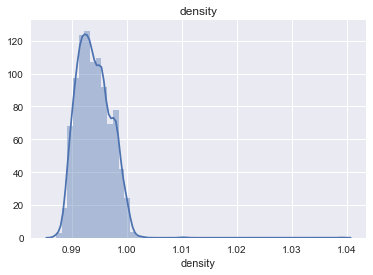

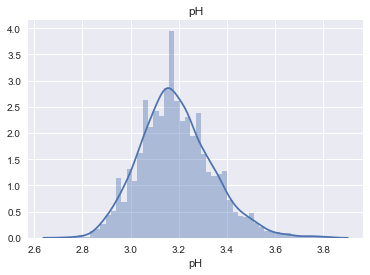

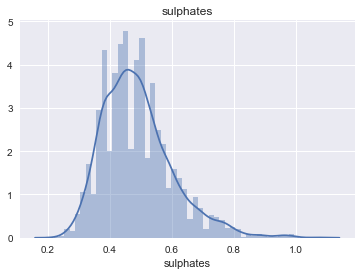

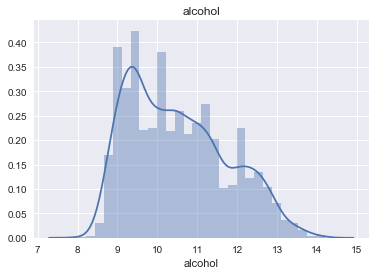

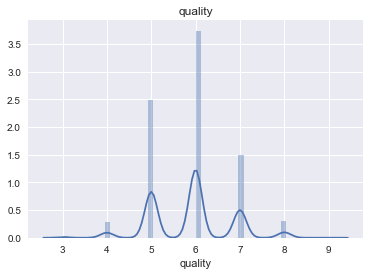

In [13]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

“pH” column appears to be normally distributed

remaining all independent variables are right skewed/positively skewed

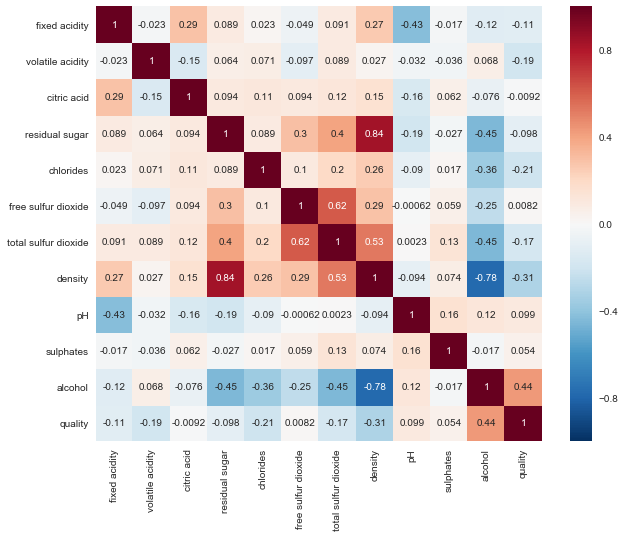

In [14]:
#finding the correlation using heat map.
ax,fig = plt.subplots(figsize=(10,8))
data= df.corr()
sns.heatmap(data, annot=True)
plt.show()

So in this darker shades are show more relations.

density and residual have correlation of 0.84 whcih is high so we wont be using them together in model,

alcohol and density has negative high correlation, so will take one

free sulfur acid and citric acid has nearly zero correlation with quality so we cant remove them in model

i wont consider density also to avoid multi colinearity 


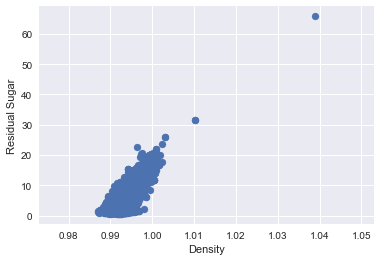

In [15]:
#No as per finding from correlation, checking the scatter plots

plt.scatter(df['density'],df['residual sugar'])
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

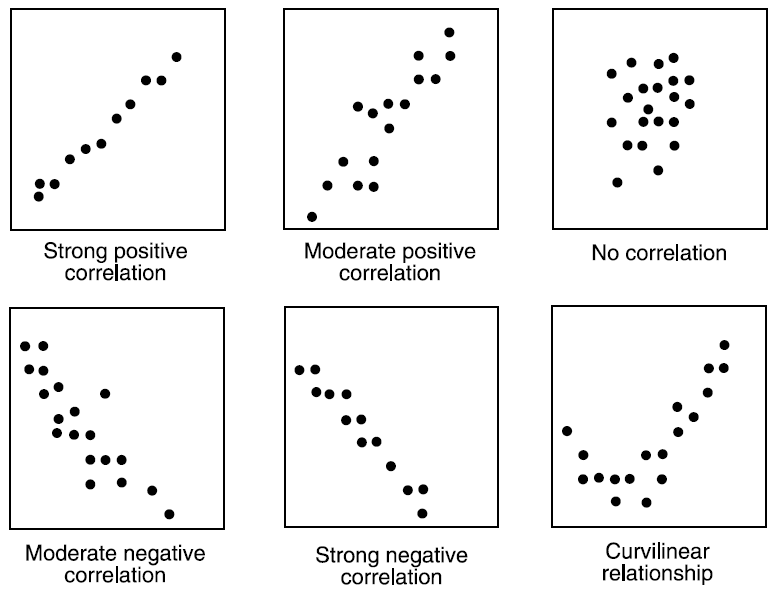

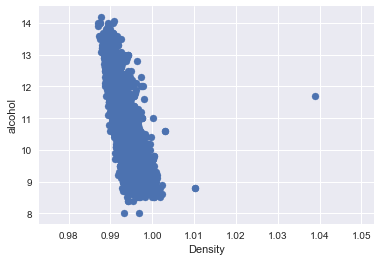

In [16]:
plt.scatter(df['density'],df['alcohol'])
plt.xlabel('Density')
plt.ylabel('alcohol')
plt.show()

In [17]:
out=df.describe(percentiles=[0.05,0.95])

In [18]:
type(out)

pandas.core.frame.DataFrame

In [19]:
out.index

Index(['count', 'mean', 'std', 'min', '5%', '50%', '95%', 'max'], dtype='object')

In [20]:
out.drop(['count', 'mean', 'std', 'min', '50%', 'max'], axis=0, inplace=True)

In [21]:
out.drop(['alcohol','quality'], axis=1,inplace=True)

In [22]:
out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
5%,5.6,0.15,0.17,1.1,0.027,11.0,75.0,0.989638,2.96,0.34
95%,8.3,0.46,0.54,15.7,0.067,63.0,212.0,0.999000,3.46,0.71


In [23]:
out.loc['5%','density']

0.98963849999999987

In [24]:
for i in out.columns:
    print(df[i].quantile([0.05,.95]))

0.05    5.6
0.95    8.3
Name: fixed acidity, dtype: float64
0.05    0.15
0.95    0.46
Name: volatile acidity, dtype: float64
0.05    0.17
0.95    0.54
Name: citric acid, dtype: float64
0.05     1.1
0.95    15.7
Name: residual sugar, dtype: float64
0.05    0.027
0.95    0.067
Name: chlorides, dtype: float64
0.05    11.0
0.95    63.0
Name: free sulfur dioxide, dtype: float64
0.05     75.0
0.95    212.0
Name: total sulfur dioxide, dtype: float64
0.05    0.989638
0.95    0.999000
Name: density, dtype: float64
0.05    2.96
0.95    3.46
Name: pH, dtype: float64
0.05    0.34
0.95    0.71
Name: sulphates, dtype: float64


# Outlier treating with capping and imputing.


i capped them between 5 and 95 th quantile and imputed them with mean value

In [25]:
for i in out.columns:
    fun= (lambda x: x if x>=out.loc['5%',i] and x<=out.loc['95%',i] else df[i].mean() )
    df[i]= df[i].apply(fun)

In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.822563,0.270199,0.328766,6.009661,0.043399,34.611621,137.579410,0.993978,3.185327,0.484175,10.514267,5.877909
std,0.611580,0.069224,0.077599,4.145904,0.008426,12.432438,32.333315,0.002352,0.112594,0.082477,1.230621,0.885639
min,5.600000,0.150000,0.170000,1.100000,0.027000,11.000000,75.000000,0.989640,2.960000,0.340000,8.000000,3.000000
25%,6.400000,0.220000,0.280000,1.900000,0.037000,25.000000,113.000000,0.992092,3.110000,0.420000,9.500000,5.000000
50%,6.854788,0.270000,0.320000,5.900000,0.044000,35.000000,138.360657,0.994027,3.188267,0.489847,10.400000,6.000000
75%,7.200000,0.310000,0.370000,8.600000,0.049000,43.000000,160.000000,0.995600,3.260000,0.530000,11.400000,6.000000
max,8.300000,0.460000,0.540000,15.700000,0.067000,63.000000,212.000000,0.999000,3.460000,0.710000,14.200000,9.000000


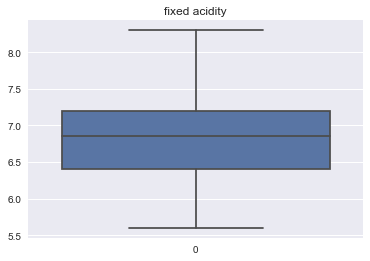

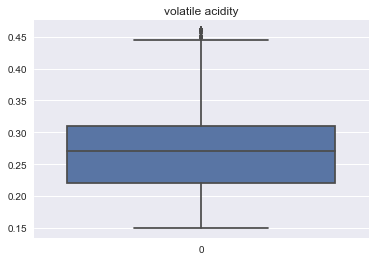

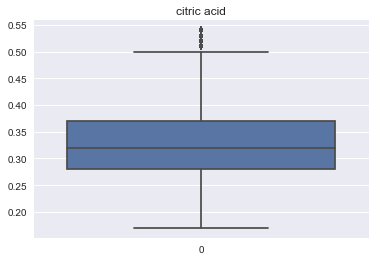

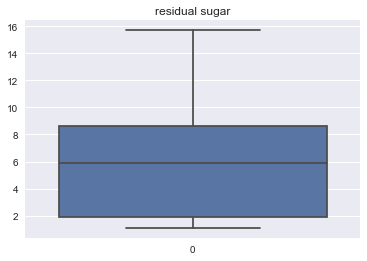

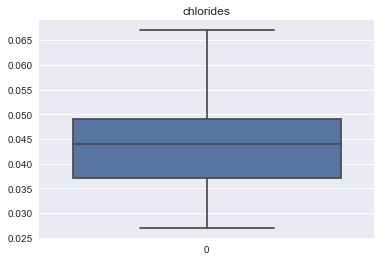

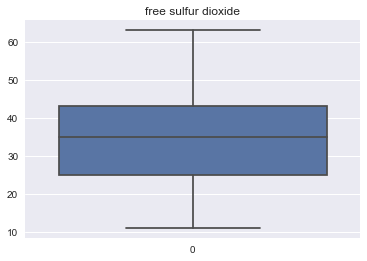

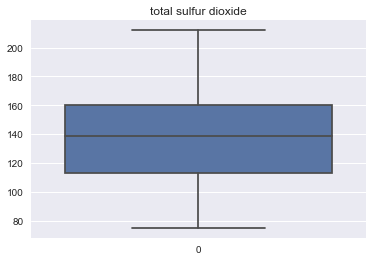

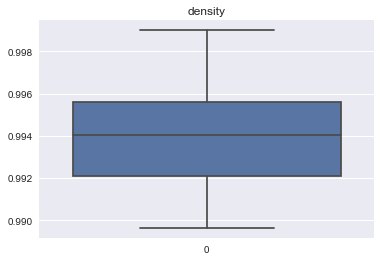

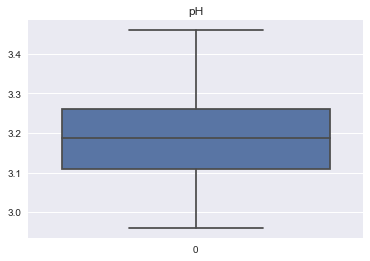

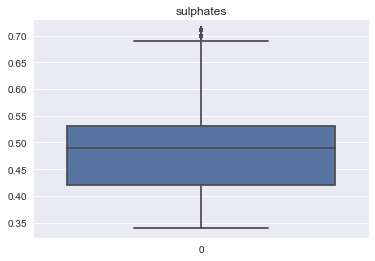

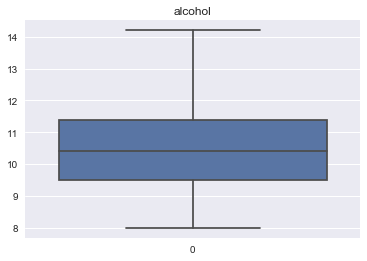

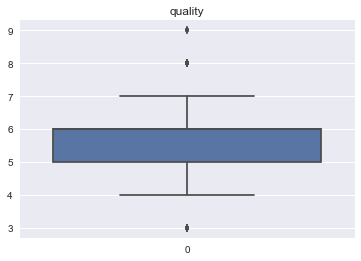

In [27]:
for i in df.columns:
    sns.boxplot(data= df[i])
    plt.title(i)
    plt.show()

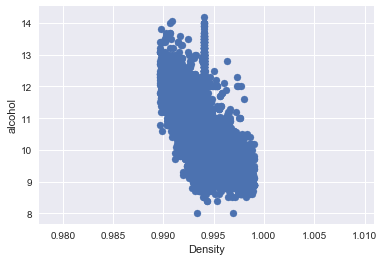

In [28]:
plt.scatter(df['density'],df['alcohol'])
plt.xlabel('Density')
plt.ylabel('alcohol')
plt.show()

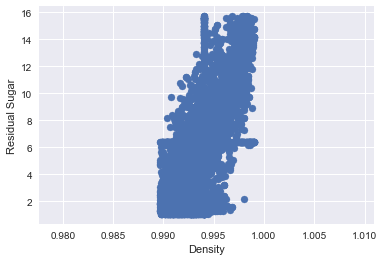

In [29]:
plt.scatter(df['density'],df['residual sugar'])
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

In [54]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [31]:
# x= df.drop(['quality'], axis=1) choose this columns based on correlations
x= df.loc[:,['fixed acidity', 'volatile acidity','residual sugar',
       'chlorides', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'quality']]
y= df.loc[:,'quality']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
l= LinearRegression()
l.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
l.score(xtest,ytest)

1.0

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
t= DecisionTreeRegressor(max_depth=5,min_samples_leaf= 20)

In [38]:
t.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [39]:
t.score(xtest,ytest)

0.99183448525697959

In [40]:
from sklearn.linear_model import LogisticRegression
l= LogisticRegression()
l.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
l.score(xtest,ytest)

0.86122448979591837

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
r= RandomForestClassifier(max_depth=5,min_samples_leaf= 10)

In [79]:
r.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [80]:
r.score(xtest,ytest)

0.97142857142857142

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
k= KNeighborsClassifier(n_neighbors=5)

In [72]:
k.fit(xtrain,ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
k.score(xtest,ytest)

0.70340136054421765

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,r.predict(xtest))

array([[  0,   9,   0,   0,   0,   0],
       [  0,  51,   9,   0,   0,   0],
       [  0,   0, 458,   0,   0,   0],
       [  0,   0,   0, 630,   0,   0],
       [  0,   0,   0,   0, 267,   0],
       [  0,   0,   0,   0,  12,  34]])

In [75]:
from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     'kernel': ['linear', 'poly', 'rbf'],
#     'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 50, 100],
#     'gamma': [0.01, 0.1, 0.5, 1]
# }
# svc= SVC(random_state=8)
# clf = GridSearchCV(svc, param_grid=parameters, cv=3)
# clf.fit(xtrain, ytrain)

i got this parameters with grid search

In [76]:
svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=8, shrinking=True,
  tol=0.001, verbose=False)
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)

0.98978996499416572

In [77]:
svc.score(xtest,ytest)

0.81700680272108839

In [81]:
from sklearn.model_selection import cross_val_score

In [89]:
cvs= cross_val_score(svc,xtest,ytest,cv=10, scoring='accuracy')

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

In [90]:
cvs.mean()

0.67882005218178376

In [91]:
cvs.std()

0.025278074595526043

In [92]:
cvs= cross_val_score(r,xtest,ytest,cv=10, scoring='accuracy')
cvs.mean()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.93404931450253326